In [1]:
%pip install matplotlib

import numpy as np
import pandas as pd	
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
np.random.seed(42)
size = np.random.randint(800, 2000, 100)
bedroom = np.random.randint(1, 5, 100)
age = np.random.randint(1, 30, 100)

# price = 50000 + (size * 100) + (bedroom * 20000) - (age * 1000) + np.random.normal(0, 10000, 100)
price = 50 + 0.05 * size + 10 * bedroom - 0.7 * age + np.random.normal(0, 10, 100)

In [ ]:
df = pd.DataFrame({
	'Size': size,
	'Bedroom': bedroom,	
	'Age': age,
	'Price': price
})

In [4]:
df.head()

,Size,Bedroom,Age,Price
0,1926,4,5,183.428246
1,1660,4,1,177.315964
2,1930,2,19,151.730546
3,1895,1,10,149.556230
4,1844,4,12,183.448106


In [6]:
df.corr()

,Size,Bedroom,Age,Price
Size,1.000000,-0.077914,0.112461,0.649571
Bedroom,-0.077914,1.000000,-0.063370,0.450776
Age,0.112461,-0.063370,1.000000,-0.292943
Price,0.649571,0.450776,-0.292943,1.000000


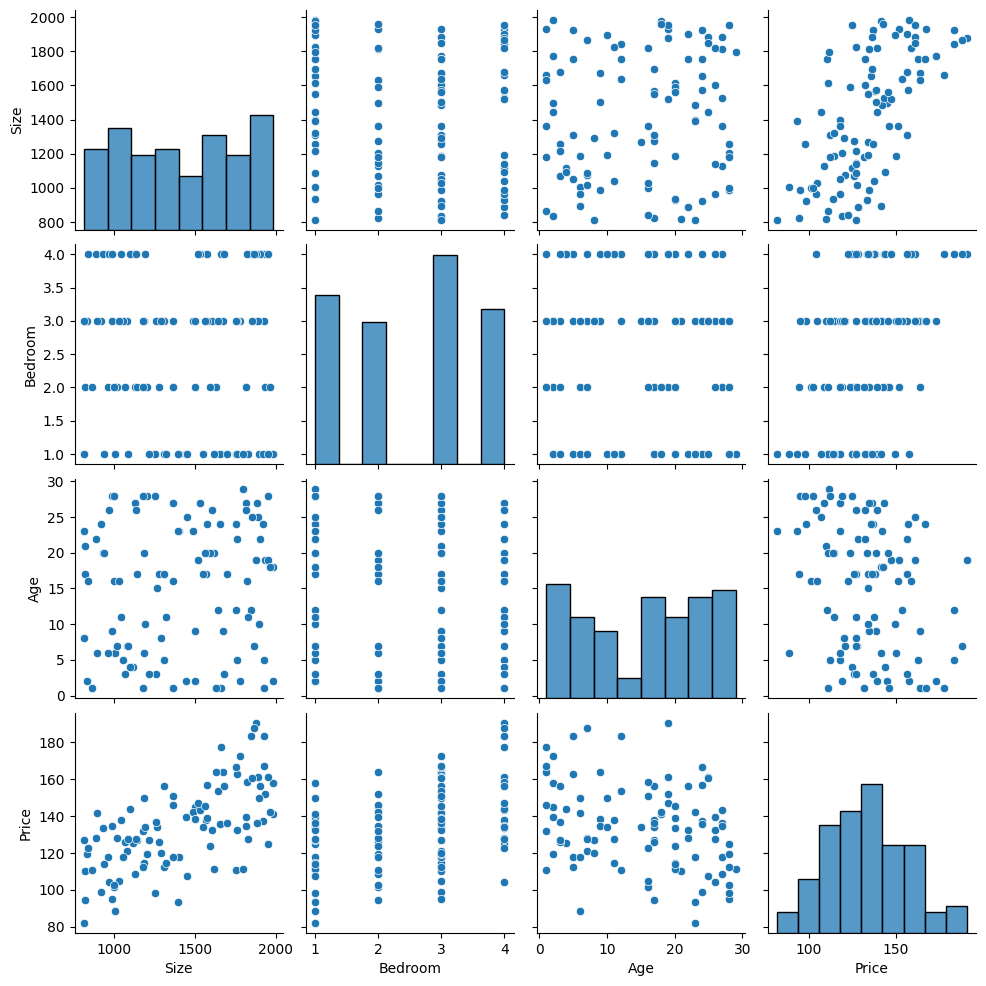

In [5]:
# visualize the data
sns.pairplot(df)

In [8]:
# dependent and independent variables
X = df[['Size', 'Bedroom', 'Age']]
y = df['Price'].values.reshape(-1, 1)

In [9]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(X)

In [ ]:
X = np.hstack((np.ones((X.shape[0], 1)), X))  # add a bias term ??

In [26]:
n_samples, n_features = X.shape

def cost_function(X, y, theta):
	m = len(y)
	predictions = X.dot(theta)
	error = predictions - y
	cost = (1 / (2 * m)) * np.sum(np.square(error))
	return cost	
    

def gradient_descent(X, y, theta, learning_rate, n_iterations):
	m = len(y)
	cost_history = np.zeros(n_iterations)

	for i in range(n_iterations):
		predictions = X.T.dot(theta)
		error = predictions - y
		theta -= (learning_rate / m) * (X.dot(error))
		cost_history[i] = cost_function(X, y, theta)

	return theta, cost_history

In [47]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    return cost

In [48]:
def gradient_descent(X, y, theta, learning_rate, epochs):
    cost_history = []
    theta_history = [theta.copy()]

    for _ in range(epochs):
        gradients = (1 / n_samples) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)

        cost_history.append(cost)
        theta_history.append(theta.copy())

    return theta, cost_history, np.array(theta_history)

In [49]:
theta_init = np.zeros((n_features, 1))
theta_opt, cost_history, theta_path = gradient_descent(X, y, theta_init, learning_rate=0.1, epochs=100)


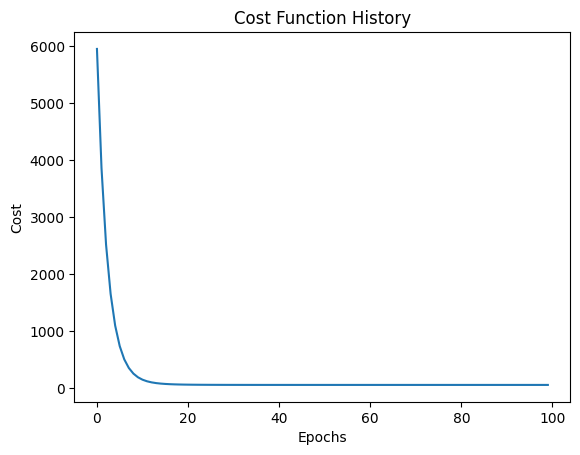

In [50]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

In [51]:
from matplotlib import cm

# Fix intercept and Age
fixed_age = theta_opt[3, 0]
fixed_bias = theta_opt[0, 0]

# Mesh grid
m_vals = np.linspace(theta_opt[1,0] - 1, theta_opt[1,0] + 1, 50)
b_vals = np.linspace(theta_opt[2,0] - 1, theta_opt[2,0] + 1, 50)
M, B = np.meshgrid(m_vals, b_vals)
Z = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        theta_temp = np.array([
            [fixed_bias],
            [M[i, j]],       # size weight
            [B[i, j]],       # bedroom weight
            [fixed_age]      # age weight (fixed)
        ])
        Z[i, j] = compute_cost(X, y, theta_temp)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap=cm.viridis, alpha=0.8)

# Plot descent path
ax.plot(theta_path[:, 1], theta_path[:, 2], cost_history, color='red', label='Gradient Descent Path')
ax.set_xlabel('Theta1 (Size)')
ax.set_ylabel('Theta2 (Bedrooms)')
ax.set_zlabel('Cost')
ax.set_title('Gradient Descent toward Global Minimum')
plt.legend()
plt.show()


ValueError: shapes (100,5) and (4,1) not aligned: 5 (dim 1) != 4 (dim 0)